In [2]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras

\begin{align}
L_2(A,B) &= \sqrt{\sum_{i=1}^{n}(A_i - B_i)^2} \\
\|A\| &= \sqrt{\sum_{i=1}^{n}(A_i^2)}\\
A \cdot B &= \sum_{i=1}^{n}(A_iB_i) = \|A\|\|B\|\cos(\theta) \\
\frac{L_2(X,Y)^2}{2} &= 1 - (X \cdot Y) \\
\end{align}

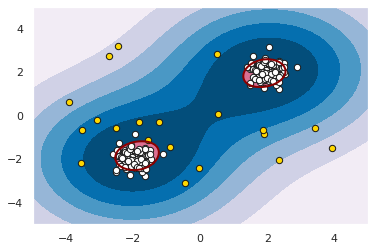

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='white', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# plt.legend([a.collections[0], b1, b2, c],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "error train: %d/200 ; errors novel regular: %d/40 ; "
#     "errors novel abnormal: %d/40"
#     % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [ ]:
data = """0	8277	400	3640	1253	3851	9776
8277	0	8252	10345	6063	10279	1788
400	8252	0	3251	1557	3456	9536
3640	10345	3251	0	5259	330	8199
1253	6063	1557	5259	0	5620	4667
3851	10279	3456	330	5620	0	8133
9776	1788	9536	8199	4667	8133	0"""

data = data.splitlines()
data = [list(map(int, i.split())) for i in data]
data = np.array(data)
cities = 'Frankfurt	Hong Kong	London	Montreal	Moscow	New York	Tokyo'.split('\t')
print(cities)
print(data)

['Frankfurt', 'Hong Kong', 'London', 'Montreal', 'Moscow', 'New York', 'Tokyo']
[[    0  8277   400  3640  1253  3851  9776]
 [ 8277     0  8252 10345  6063 10279  1788]
 [  400  8252     0  3251  1557  3456  9536]
 [ 3640 10345  3251     0  5259   330  8199]
 [ 1253  6063  1557  5259     0  5620  4667]
 [ 3851 10279  3456   330  5620     0  8133]
 [ 9776  1788  9536  8199  4667  8133     0]]


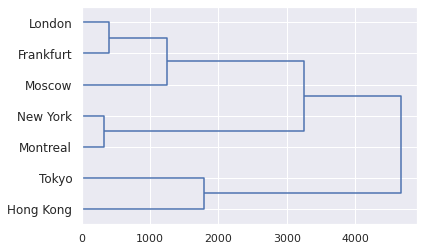

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=cities, orientation='right', color_threshold=0, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                linkage='single', affinity='precomputed')
model = model.fit(data)
plot_dendrogram(model)
plt.show()

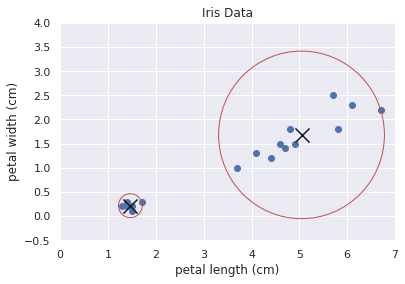

In [ ]:
iris = load_iris()
iris_features = iris.feature_names
iris_labels = iris.target
iris_data = iris.data
iris_data_2d = iris_data[:, 2:]
data = iris_data_2d[0:-1:9]

plt.scatter(data[:,0], data[:,1])
plt.xlabel(iris_features[2])
plt.ylabel(iris_features[3])
plt.title('Iris Data')

km = KMeans(n_clusters=2, max_iter=4, init='random', n_init=1, random_state=0)
km.fit(data)

centroids = km.cluster_centers_
ax = plt.gca()
ax.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=200, linewidths=3, color='k')
plt.xlim(0,7)
plt.ylim(-.5,4)

# A utility function for below. Note `norm` defaults to L2
dist = lambda x, y: np.linalg.norm(x - y)

# Show bounding circles for each centroid.
predictions = km.predict(data)
for i, centroid in enumerate(centroids):
  farthest = centroid
  for j, datum in enumerate(data):
    if predictions[j] != i: 
      continue
    if dist(centroid, datum) > dist(centroid, farthest): 
      farthest = datum
  radius = dist(centroid, farthest)
  c = plt.Circle(centroid, radius, color='r', fill=False)
  ax.add_artist(c)

plt.show()

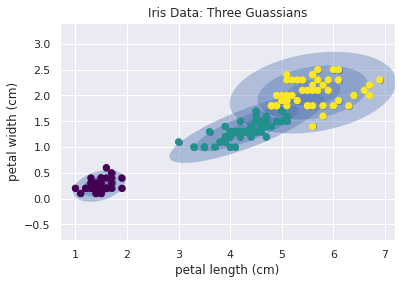

In [ ]:
from sklearn.mixture import GaussianMixture

data = iris_data_2d

plt.scatter(data[:,0], data[:,1])
plt.xlabel(iris_features[2])
plt.ylabel(iris_features[3])
plt.xlim(0,8)
plt.ylim(-.5,4)

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor + 0.2)

gmm = GaussianMixture(n_components=3,
                      covariance_type='full',
                      max_iter=20,
                      random_state=0)
gmm.fit(data)
plot_gmm(gmm, data)
plt.title('Iris Data: Three Guassians')
plt.show()

\begin{align}
c(i) &= \{1,\dots,n\} \rightarrow \{1,\dots,K\} \\
n_k &= \#\{i: c(i)=k\} \\
W(c) &= \frac{1}{2} \sum_{k=1}^K \frac{1}{n_k} \sum_{i: c(i)=k} \sum_{j: c(j)=k} d(i,j)\\
\end{align}

\begin{align}
W(c) &= \frac{1}{2} \sum_{k=1}^K \frac{1}{n_k} \sum_{i: c(i)=k} \sum_{j: c(j)=k} ||x_i-x_j||_2^2 \\
&= \sum_{k=1}^K \sum_{i: c(i)=k} ||x_i-m_k||_2^2 \\
m_k = \bar{x}_{(k)} &= \frac{1}{n_k} \sum_{j: c(j)=k} x_j \\
\end{align}

\begin{align}
W(c, m_1, \dots, m_K) &= \sum_{k=1}^K \sum_{i: c(i)=k} ||x_i-m_k||_2^2 \\
\end{align}

Fitting model on a small sub-sample of the data
done in 0.062s.
[[0.28282109 0.25575584 0.1827362 ]
 [0.8253892  0.85755923 0.88787845]]


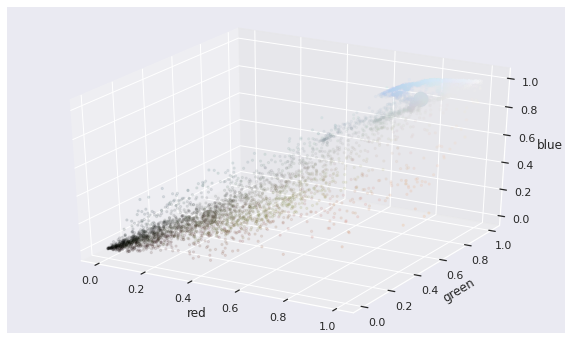

Predicting color indices on the full image (k-means)
done in 0.108s.


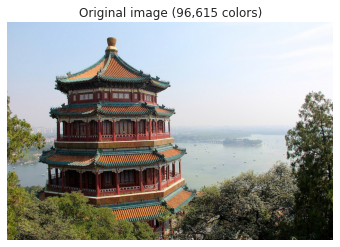

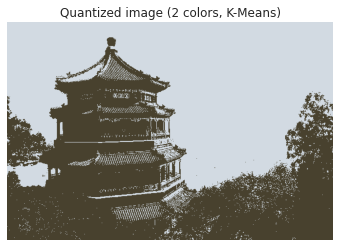

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from mpl_toolkits.mplot3d import Axes3D
import colorsys
import scipy.ndimage as ndimage

n_colors = 2

# Load the Summer Palace photo
china = load_sample_image("china.jpg")
#china = ndimage.gaussian_filter(china, sigma=(1, 1, 0), order=0)

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))
#image_array = np.array([colorsys.rgb_to_hsv(*tuple(image_array[i])) for i in range(w*h)])

image_array_sample = shuffle(image_array, random_state=0)[:5000]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(image_array_sample[:,0],
           image_array_sample[:,1],
           image_array_sample[:,2],
           marker='.', facecolors=image_array_sample, alpha=0.1)
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')

print("Fitting model on a small sub-sample of the data")
t0 = time()
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

learned_colors = kmeans.cluster_centers_
print(learned_colors)
ax.scatter(learned_colors[:,0],
           learned_colors[:,1],
           learned_colors[:,2],
           marker='o', facecolors=learned_colors, s=200)
plt.show()

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)' %n_colors)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

In [4]:
china


array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

\begin{align}
\displaystyle \\
P_{\mu,\sigma^2}(x) &= \mathcal{N}(\mu,\sigma^{2}) = \frac{1}{\sqrt{2\pi}\sigma} e^{- (x-\mu)^2/2\sigma^2} \\
\mu \\
\sigma^2 \\
\log \sqrt{2\pi}\sigma \frac{(x-\mu)^2}{2\sigma^2} \\
P_{\mu_1,\mu_2,\sigma_1^2,\sigma_2^2}(x_1,x_2) &= \mathcal{N}(\mu_1, \mu_2,\sigma_1^{2},\sigma_2^2) = \frac{1}{2\pi\sigma_1\sigma_2 \sqrt{(1-r)^2}} e^{\left({\frac{-1}{2(1-r)^2}}\right) \left( \frac{(x_1-\mu_1)^2}{\sigma_1^2} -\frac{2rx_1x_2}{\sigma_1\sigma_2} + \frac{(x_2-\mu_2)^2}{\sigma_2^2} \right)} \\
\mathcal{N}(\mu_1,\sigma_2^{2})\mathcal{N}(\mu_1,\sigma_2^{2}) &= \frac{1}{\sqrt{2\pi}\sigma_1} e^{- (x_1-\mu_1)^2/2\sigma_1^2} \frac{1}{\sqrt{2\pi}\sigma_2} e^{- (x_2-\mu_2)^2/2\sigma_2^2}\\
\Sigma &= 
\begin{pmatrix}
\sigma_1^2 & r\sigma_1\sigma2 \\
r\sigma_1\sigma2 & \sigma_2^2 \\
\end{pmatrix} \\
P_{\mu,\Sigma}(x_1, \dots, x_k) &= \mathcal{N}(\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^k|\Sigma|}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)} \\
\mathcal{L}(x^N|\mu, \sigma) &= \prod_{i=1}^N P_{\mu,\sigma^2}(x) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi}\sigma} e^{- (x-\mu)^2/2\sigma^2} \\
(\mu, \sigma)_{\textrm{MLE}} &= \operatorname*{arg\,max}_{\mu,\sigma} \mathcal{L}(x^N|\mu, \sigma) \\
\mu &\approx \frac{1}{N}\sum_{i=1}^N x_i \\
\sigma^2 &\approx \frac{1}{N}\sum_{i=1}^N (x_i-\mu)^2 \\
\Sigma &\approx \frac{1}{N}\sum_{i=1}^N (x_i-\mu)^T(x_i-\mu)\\
P(x) &= p_1 \times \mathcal{N}(\mu_1,\Sigma_1) + p_2 \times \mathcal{N}(\mu_2,\Sigma_2)\\
P(x) &= \sum_j p_j \frac{1}{\sqrt{(2\pi)^k|\Sigma_j|}}e^{-\frac{1}{2}(x-\mu_j)^T\Sigma_j^{-1}(x-\mu_j)}\\
\end{align}

In [ ]:
np.set_printoptions(precision=3, suppress=True)
from sklearn.decomposition import PCA as pca
means = iris_data.mean(axis=0)
stdvs = iris_data.std(axis=0)
centered_data = (iris_data - means)/stdvs

print(iris_features)
print('data shape:', iris_data.shape)
c = 2
u,s,v = np.linalg.svd(iris_data, full_matrices=False)
print('shapes:', u.shape, s.shape, v.shape)
evs = s**2
print('variance ratios:', evs/np.sum(evs))
reconstructed_data = np.dot(u[:,0:c]*s[0:c], v[0:c,:])
transformed_data = u[:,0:c]*s[0:c]
print('original:', iris_data[0])
print('reconstructed:', reconstructed_data[0])
print('transformed:', transformed_data[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data shape: (150, 4)
shapes: (150, 4) (4,) (4, 4)
variance ratios: [0.965 0.033 0.001 0.   ]
original: [5.1 3.5 1.4 0.2]
reconstructed: [5.095 3.506 1.402 0.202]
transformed: [-5.913  2.302]


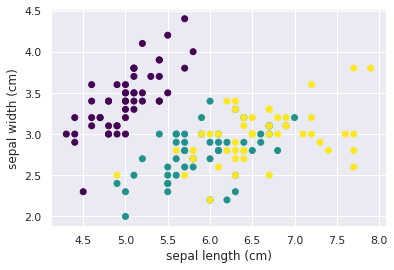

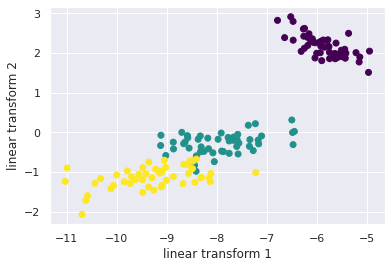

In [ ]:
plt.scatter(iris_data[:,0], iris_data[:,1], c=iris_labels, cmap='viridis', zorder=2)
plt.xlabel(iris_features[0])
plt.ylabel(iris_features[1])
plt.show()
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=iris_labels, cmap='viridis', zorder=2)
plt.xlabel('linear transform 1')
plt.ylabel('linear transform 2')
plt.show()